# Taylor Swift discography analysis: A Scientific Approach

## Table of Contents
1. [Abstract](#Abstract)
2. [Why Taylor Swift?](#Why-Taylor-Swift?)
3. [Workflow](#Workflow)
4. [Results](#Results)
5. [Conclusion](#Conclusion)
6. [References](#References)

## Abstract

With the advancements and exponential development in Data Science and AI we are now able to autmatically process and analyze big portions of data, even texts. We already use LLM for communication, fast search and small task solutions. Use Data Science and Nuron Networks to analyze product or book reviews, extract semantics from different text sources and based on the results to forcast sales or performance. 
But can these models and Data Science as well deal with something more abstract? Something with more context? In this project I will use Data Science methods to try and analyze Taylor Swift's discography lyrics and see if we get adequate results. 


## Why Taylor Swift?

Since her first album Taylor Swift has always been under spotlight of the media, for better or worse.. 

Throughout the years she has laughed, suffered, cried and had fun with friends in New York. In other words she has grown and so have her lyrics. From a country pop artist she has conquered the fields of pop, synth pop, rock, R & B , indie pop and left her mark in all those genres. 

She become exponentally a lot of people's favorite and recieved a lot of love, but where there is light there is also darkness. So under the shade of fame she also gathered a lot of hate and resentment from people, collegues and media. This has turned her quickly from people's favorite artist to an evil mastermind schemer, calculated manipulator, a 'snake', drama queen and so on and so forth. This made her disapear from the publics eye for while, but when she came back to clear her name  - she did it with a bang. Since then she has been fighting against enquality in all its forms - discrimination, sexism, homophobia, transphobia, sexual assault. 

She even lost all her music rights to the enemy's hands which left her once again devastated. This of course did not hold her back for long so she has decided to rerecord all her lost legacy in order to 'reclaim' it.

This wide spectre of emotions and experience has greately influenced her writing style. Throughout the years she has changed her mindset, her music style, her looks and figure, which directly impacted her music. This makes her the perfect candidate to challenge the models with. The wide spectrum of albums, music genres has respectively produced colorful pallete of lyrics ranging from simple lyrics ( Taylor Swift, Fearless, Speak Now) to more etherial and cryptic thematics (Folklore, Evermore, The Tortured Poets Department).

## Workflow
### Data Gathering

The data has been supplied by [Kaggle](https://www.kaggle.com/datasets/ishikajohari/taylor-swift-all-lyrics-30-albums/data) and the original file contains all the lyrics + cover art for each album and datasets containing song id and title. From everything I needed only the lyrics directory and this is why its the only thing provided here. In the lyrics directory however there are way to many albums than there are actually are. Since we only care about the lyrics I sampled only the lyrics from the albums and ignored any other versioning of the albums like remixes, or different sound editions of the same songs because they are not needed in the analysis.

### [Preprocessing]('./text-analysis/lyrics-read-preprocessing.ipynb')

In order to get as accurate as possible results we must ensure that the texts are cleaned and tydied up. Why? The answer is in the following snippet of a song lyrics:

___"***332 ContributorsTranslationsEspañolСрпскиРусскийPortuguêsNorsk (bokmål / riksmål)FrançaisفارسیNederlands*** <br>
All Too Well (***10 Minute Version) (Taylor’s Version) [From the Vault] <br>
Lyrics[Verse 1]`***<br>
I walked through the door with you, the air was cold <br>
But somethin' 'bout it felt like home somehow <br>
And I left my scarf there at your sister's house <br>
And you've still got it in your drawer, even now " <br>___

1. Each lyric file starts with a line, mentioning number of contributors and translations which has absolutely nothing to do with the text itself. Furthermore the lyrics structore holds markup elements like [Verse 1] or [Choruse] which again do not hold any value to the interpretations we are going to make for the text. Thus these must be removed.
2. After successfully removing all unncessary tokens and lines we must proceed with text `Tokenization` - Text Tokenization is a process of splitting the text into subunits which are called tokens ( or simply said - we split the text into words). This process is very important because it is essential for reducing the information entropy. And how are we going to do that?
3. Some words like ***I'll, you'll, we'll ...*** , expression particles like ***uh-oh, aha, woah ...*** which appear often in such texts will `confuse` the models later on giving them the false impression that these carry valuable information, which in fact they do not.
4. We might think we are ready but we have one last thing before we finish up - in the text usually we use verbs in different forms e.g `do, doing, did, done` which have the same meaning but different time function. For the purpose of this project temporal information is not impartant so this will more likely confuse our models than actually help it. Furthermore we also use verb derivatives `do, redo, undo` which depending on the aspect of the analysis could also potentially become obstacles so we have bring them back into their base or "root" form. This can be done in two ways:
   * Stemming - the process of reducing a word to its root or stem form. It's implementation consists in removing suffixes or prefixes from a word without considering its part of speech or meaning. "Running" - > "run"
   * Lemmatization - process of reducing a word to its base or dictionary form, called a lemma. It considers the part of speech and morphological analysis of the word to determine its lemma. "Running" might be lemmatized to "run" if it's a verb, but it might remain "running" if it's a gerund.
For the purposes of this research I have chosen Lemmatization. Even though it is slower than the Stemming it works more efficiently and it's ability to differentiate between the linguistic forms. Furthermore sometimes the Stemming produces words with no sense e.g -> "runn" from "runnning"

### Model Choice

#### Sentiment Analysis

In the search for passing models I stumbled upon two types which are mostly used - **lexicon-based** and , of course, **neural networks**:<br>
1. [Lexicon based model](./text-analysis/nltk-analysis.ipynb): the essence in grading methodology of these types of models is that they use a `lexicon` which simpler said is basically a dictionary of words, where each word has initially a score assigned. These models are known to be fast and efficient but struggle with sarcasm, complex language or domain-specific languages and sorts of slang language. The one we use in this project is from `NLTK's Vader` library `SentimentIntensityAnalyzer`.<br>
3. [Neural Networks](./text-analysis/flair-analysis.ipynb): these use pretrained language models which are 'aware' of the text and could potentially give a better analysis and translation, but naturally are more slower than the rule-based algorithms. The model used in this project is from `Flair` - `TextClassifier`.<br>

#### Emotions
Apart from sentiment analysis I also wanted to try and extract the `emotions` from the song texts. For the [emotion extraction](./text-analysis/ncrlex-analysis.ipynb) I used the [NCRLex](https://pypi.org/project/NRCLex/) model which is lexicon-based. By using dictionary with around 27,000 words NCRLex will assign a specific emotional state(s) to each song which we then we will use to derive each album's most common feelings.

#### Influential Words
Not only in songs but in every text there are some words which carry most of the valuable information which is key to udnerstanding the concep of the text. In lyrics these could be words of emotion, specific words like happyness, love, heartbreak, rage etc. The algorithm by which these words are selected is called `TF-IDF` which  stands for `Term Frequency - Inversed Document Frequency`. This is a statistical model which compares how often a word appears in a specific test to how often it appears in a collection of texts:<br>
                                    $$ w_{x,y} = tf_{x,y} * \log(N/df_{x,y})$$ 

The theory is that the less the word appears in different text the more value and information it provides for the specific text.
`TF-IDF` is also applied in the model mentioned above and many others where text analysis is required.

## Results

### Sentiment and Emotions
Both of the aforementioned models for sentiment analysis mentioned in [Sentiment Analysis](#Sentiment-Analysis) are deemed to be very precise. Let's explore the results. <br>

#### NLTK Results
The following image represents the mean score assigned by the NLTK's SentimentIntesityAnalyzer of each album. The mean value in this case shows us how often a positive song appears in each album, which in that case is what we care about.<br>

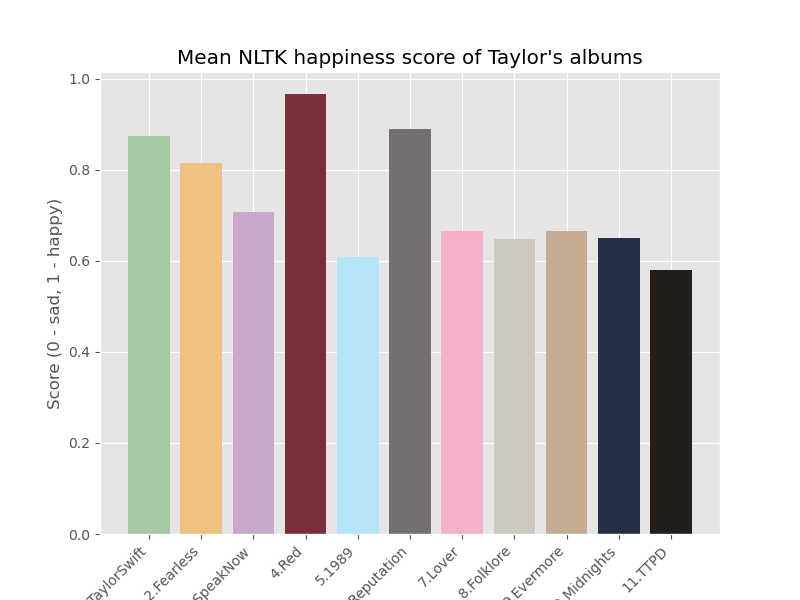 

First thing we notice is how high these mean values are. This suggests that all the albums ( some of them reaching score of 0.8 ) are happy albums. A monotonical drop is to be observed after the 6-th album Reputation. In the following releases we see a signifficant drop in the mood.

#### Flair Results
The png we see below describes the distribution of positive scored songs along the album as per Flair's TextClassifier. The values are in the same range as NLTK's.

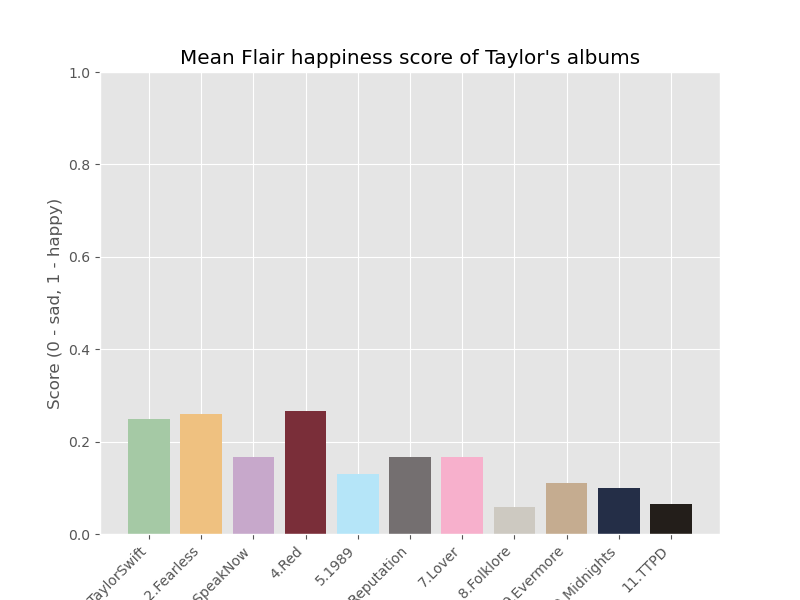

What we see here however is a complete different story. In Flair's oppinion there is barely a happy album in Taylor's discography. However we see a similar trend where all albums after Reputation are with a significantly sadder mood in comparison to the earlier albums.

### Sentiment and Emotions
We saw each model's oppinion. Now lets try to determine which one is more accurate ( if that is even possible). By using NCRLex we are going to extract the most common emotions found in each album. Maybe this might help us make a decision.

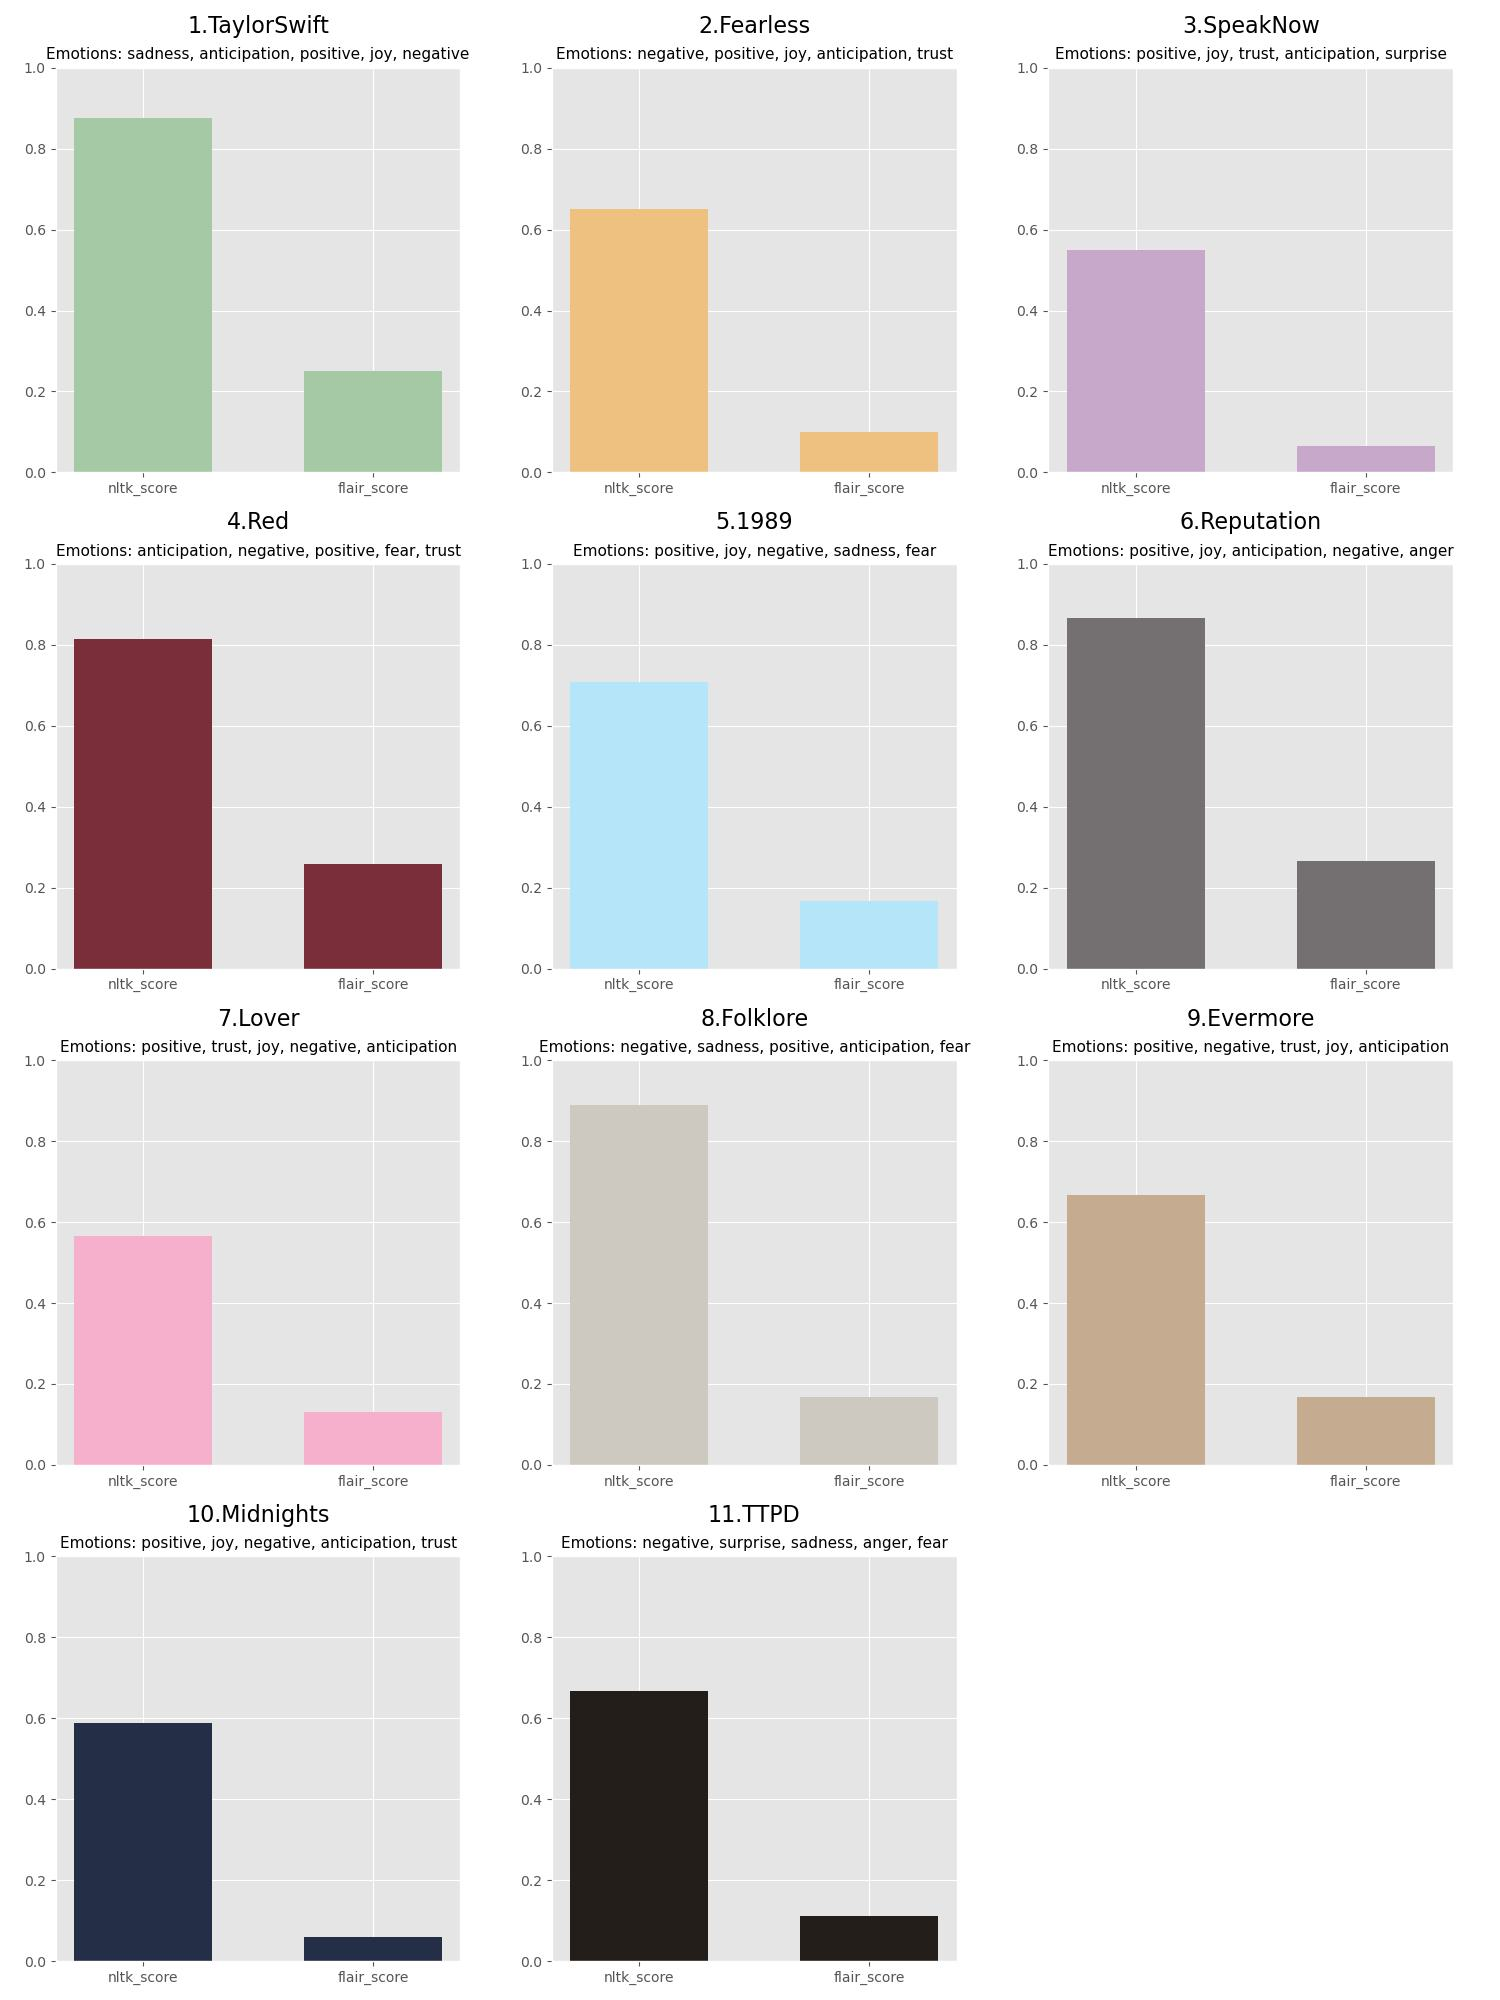

Interesting thing we see here is that the models catch different neuances better:
    Where we have predominant happy feelings - Debut, Fearless, Speak Now, Reputation - the nltk has better accuracy, where we have more melancholic or sad feeling - Folklore, Evermore, The Tortured Poets Department - we see the flair model has adjusted better. This difference in grading might have to do with how both of the models process the information. We know that NLTK is lexicon based, so each word has a specific value assigned to it, so when it sees a happy word it knows it is a happy word and doesnt care about context. Where Flair looks also for that, which might be the reason why it dsitinguishes better hyperbolated sad text, but at the same time it might also be looking for hidden meanings where there are none.
    
   <div class="alter alert-box alert-info">
     Here is a great moment to add that the Flair model has been pretrained on other texts, which might not have the samo            connotations criptivity and context as Taylor's songs and thus making it harder on the model to give an adequate               predictions.
    </div>
    
<br>

   <div class="alter alert-box alert-warning">
    Why not train the model? The reason for that is because I was not able to find a definite and official documentation on the     songs. By that I mean to say that I do not know which song is actually accepted as sad or happy or indifferent. So even if      I try to find something this could secure an official statement and thus I might be comparing the results with someone's        interpretation of the song. However this could be a great idea for a project in the upcomming modules of the course path.
   </div>

### Influential Words
In the last chapter of my experiment I will try and fetch the most influential words which might be shaping the albums thematic.  For this goal I used NLTK's TF-IDF Analyzer which I describe how it works in the [Influential Words Chapter](#Influential-Words)
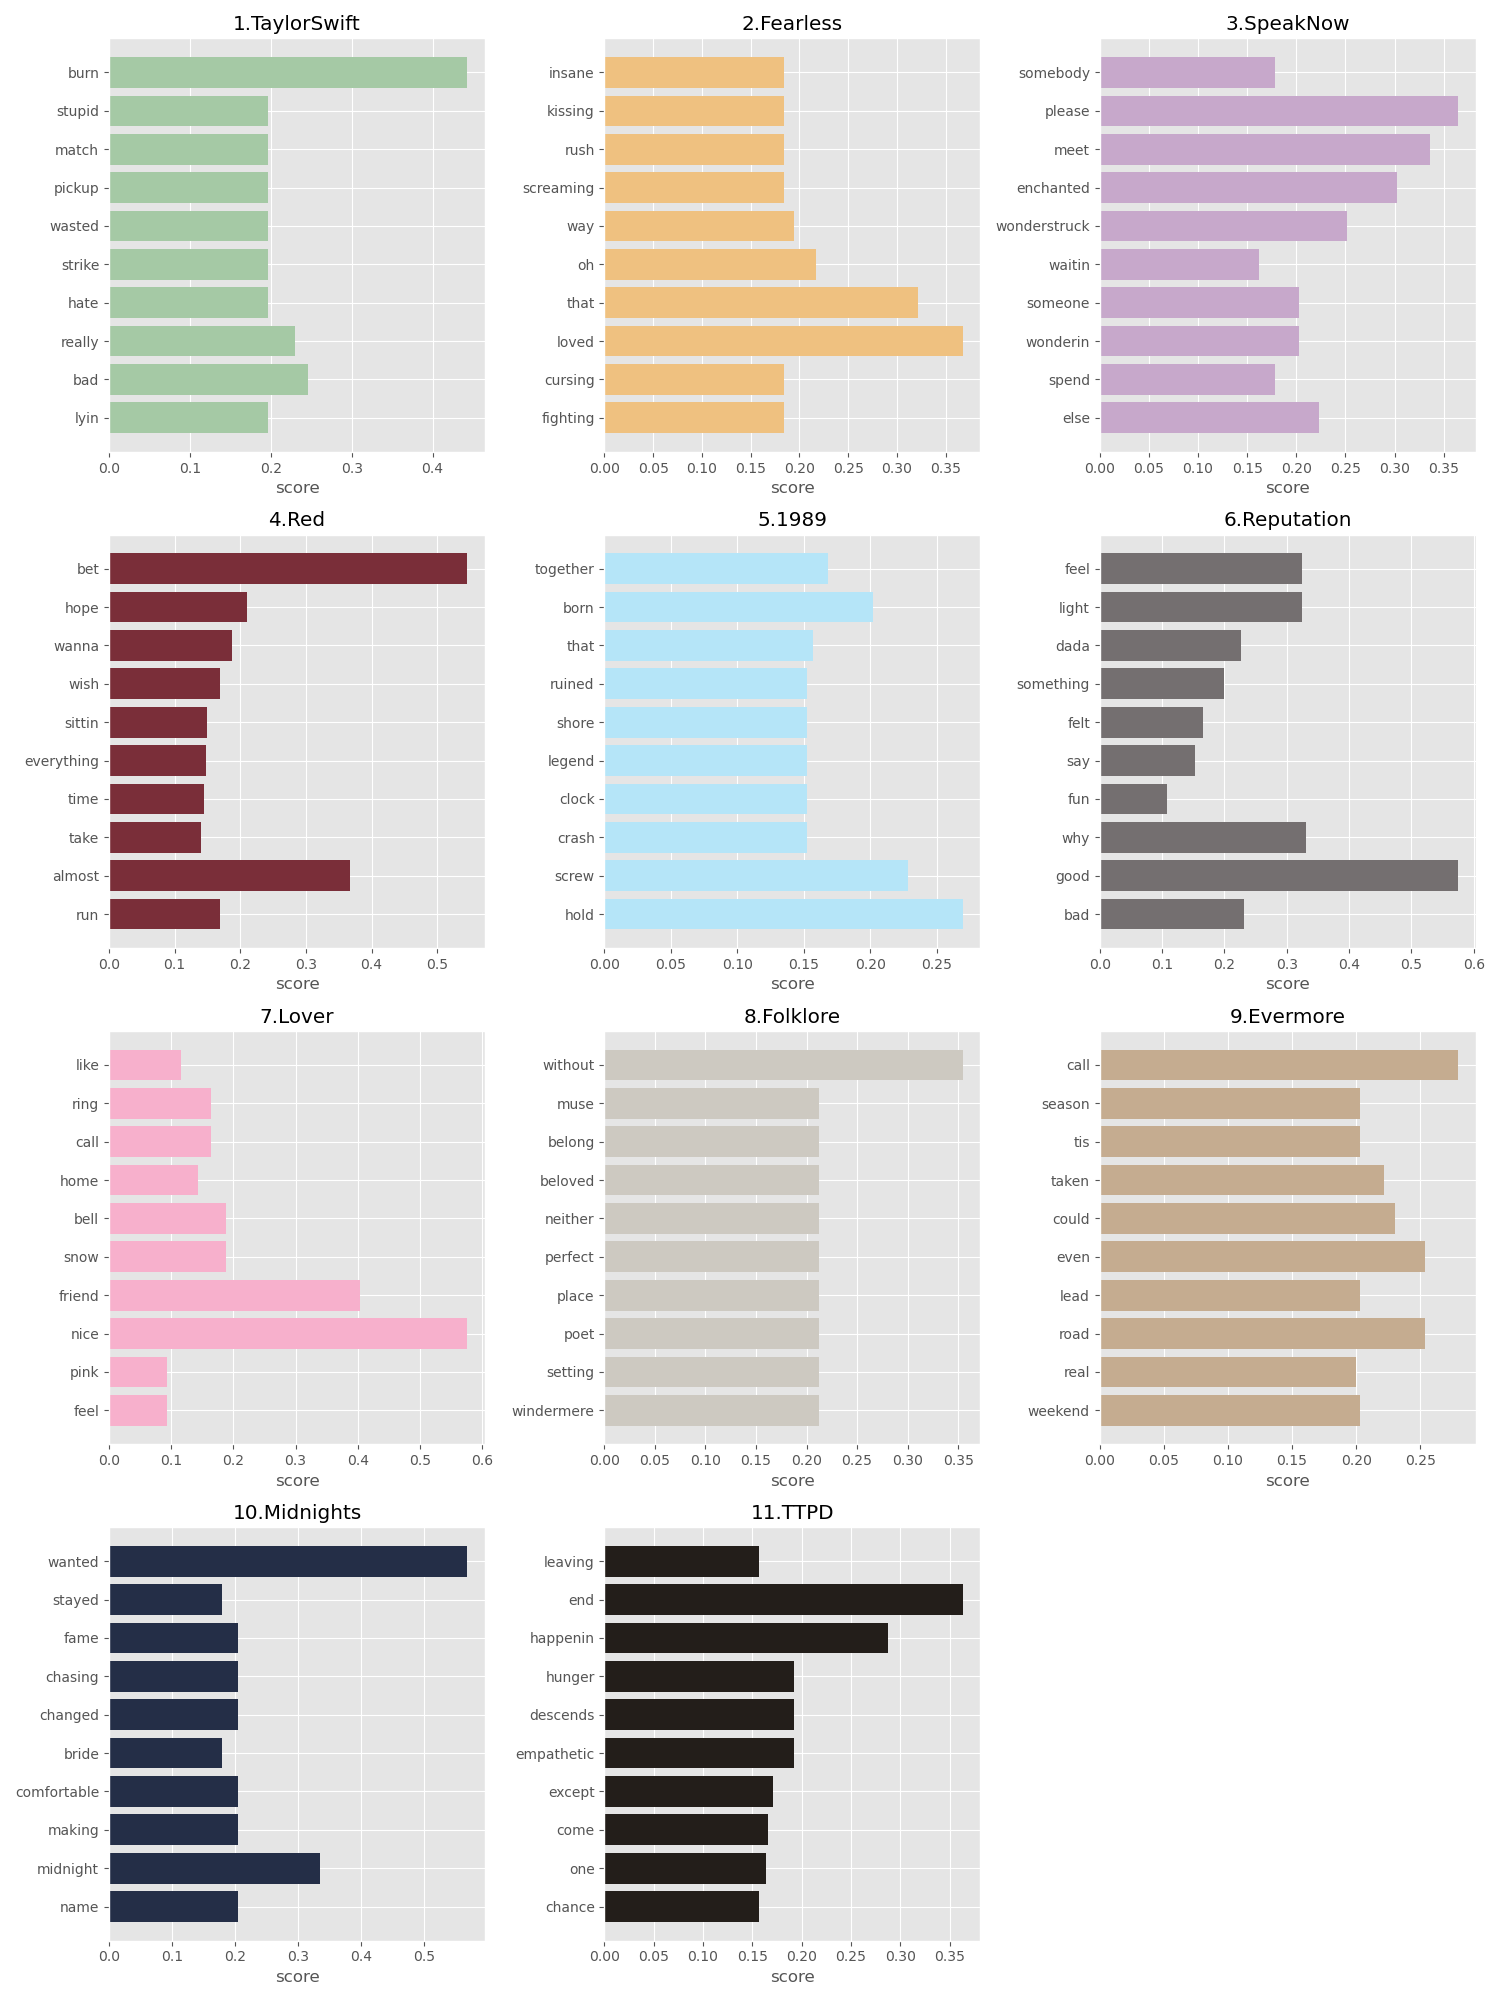

Like the emotions here we see the same story - influential words with polar connotations define the albums thematics. But do these words give us enough information so we could make an assumption about the albums thematics? Let's discuss the albums take a look at some of the  albums:
1. Taylor Swift (Debut) : Here we have words like bad, burn, match, lying which suggest suggest anger or sadness. We do get sadness as an emotion along with 'negative' which might as well include rage and anger. Here we might say that Taylor is angry at someone. In reality this album does include such songs like 'Picture to Burn' from which more of the words are taken. In that case we might come to the conclusion that Maybe the most influential song or thematic is being mad at someone who is lying which paints the albums thematic. However score > 0.8 is too much for such album filled with rage and disapointment.
2. Fearless: In fearless we see a lot of mixed emotions like negative, positive, anticipation, trust. And in the words we see members like 'kissing', 'rush', 'cursing', 'screaming','loved' which intuitively suggest a relationship problems. We can assume that even though she was fighting with that person she also loved him a lot.
3. Speak Now: In this album we see only positive emotisons: joy, trust, anticipation, surpice , but in the word analysis we also see influential members like, somebody, please, meet, waiting which also give the impression that maybe the protagonist in the songs is a bit anxious or nervious. So having sentiment value around 0.6 is actually pretty decent. ( Same also goes for Fearless)
4. Red: In Red we see words such as hope, bet, wish and the most freaquent emotion is actually anticipation. So maybe the protagonist is reminicing about something. We see also words like time, run, almost, which suggest that maybe she is thinking about something that almost happen. This could not be very joyous right?

If we continue our analysis on each album we are going to sumble upon the same relation we saw earlier - the rule-based model found easily albums with happy thematics like Reputation and Lover, but struggled to read between the lines of Red and Debut album, where Flair thrived.

## Conclusion

The research we conducted has led me to the conclusion that separately these two types of analyzers work I would say good. But I believe that if they join forces for example in a reinforcement + transfer learning process, we might be able to create a model which might become proficient into analyzing complex text with cryptic meanings and deep context. 

Something else I managed to discover is that the algorithms for Lemmatization and removing stop words didn't work optimally. Some slang version of the words like lying -> lyin', did not get lemmatized. Verbs in present continious tense got mistaken for gerundivum forms -> 'screaming', 'crying'. 'Loved' did not get converted to 'love' which might have caused confusion in the process of grading the songs. Also we see emotion sound particles like 'dada' in reputiation which have not been removed. Throughout the experiment I was able to find even more like 'uhoh', 'woah', which in that case are not a word and might also cause confusion. In that case we must also think of better ways to clean up the texts for better and optimal analysis. 

How this project can be continued? One thing I was thinking of was to try and analyze the audio of the songs. From there we can pull more information about the songs because often times the melody, beat, voice of the singer give additional value and weight to weather a song can be described as happy or sad. It was also thought as a part of the current project but I was not able to find a valid legal approval to pull the audios from the internet, which most probably would be considered piracy. 

A good comprehencive guide can be found under the following link https://www.topcoder.com/thrive/articles/audio-data-analysis-using-python

## References

* [nltk](https://www.nltk.org/api/nltk.sentiment.SentimentIntensityAnalyzer.html?highlight=sentimentintensity)
* [nltk vade](https://hex.tech/use-cases/sentiment-analysis/vader-sentiment-analysis/#:~:text=VADER%20is%20a%20rule%2Dbased,which%20is%20designed%20explicitly%20for)         
* [flair](https://flairnlp.github.io/docs/tutorial-basics/tagging-sentiment)

* [ncrlex](https://pypi.org/project/NRCLex/#description)

* [nltk sentiment analysis article](https://www.datacamp.com/tutorial/text-analytics-beginners-nltk?utm_source=google&utm_medium=paid_search&utm_campaignid=1455363063&utm_adgroupid=147761326546&utm_device=c&utm_keyword=&utm_matchtype=&utm_network=g&utm_adpostion=&utm_creative=709905543963&utm_targetid=dsa-2220136287253&utm_loc_interest_ms=&utm_loc_physical_ms=9197525&utm_content=dsa%7Egeneric%7Ecourses%7Epython&utm_campaign=220808_1-sea%7Edsa%7Egeneric_2-b2c_3-row-p2_4-prc_5-na_6-na_7-le_8-pdsh-go_9-nb-e_10-na_11-na-fawaug24&gad_source=1&gbraid=0AAAAADQ9WsHiqoY-tBxysFbJQYkiFipJD&gclid=Cj0KCQjw28W2BhC7ARIsAPerrcIDYekvOwX4A2o77iGly2-iXrUa9jqfUytiXMt5412cCS1NjA6kSzkaAjrREALw_wcB&dc_referrer=https%3A%2F%2Fwww.rdocumentation.org%2F)

* [TF-IDF Docs](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer)
* [TF-IDF Article](https://towardsdatascience.com/text-summarization-using-tf-idf-e64a0644ace3)

* [Sentiment Analysis Idea and Inspiration](https://rpubs.com/rafrys/723764)